In [2]:
import findspark
findspark.init("C:\spark")

import pyspark
from pyspark.sql import  SparkSession
from pyspark.conf import SparkConf

In [4]:
spark = SparkSession.builder.master("local").appName("Psypark Giriş").getOrCreate()

sc = spark.sparkContext

sc

<SparkContext master=local appName=Psypark Giriş>

In [6]:
spark_df = spark.read.csv("churn.csv" , header=True , inferSchema=True)

In [7]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [8]:
spark_df.head()

Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1)

In [9]:
spark_df.show()

+---+-------------------+----+--------------+---------------+-----+---------+-----+
|_c0|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-------------------+----+--------------+---------------+-----+---------+-----+
|  0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|        Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0

In [13]:
spark_df.show(8)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|     Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|   Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 8 rows



In [11]:
spark_df.show(8 , truncate=False)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|Names           |Age |Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|0  |Cameron Williams|42.0|11066.8       |0              |7.22 |8.0      |1    |
|1  |Kevin Mueller   |41.0|11916.22      |0              |6.5  |11.0     |1    |
|2  |Eric Lozano     |38.0|12884.75      |0              |6.67 |12.0     |1    |
|3  |Phillip White   |42.0|8010.76       |0              |6.71 |10.0     |1    |
|4  |Cynthia Norton  |37.0|9191.58       |0              |5.56 |9.0      |1    |
|5  |Jessica Williams|48.0|10356.02      |0              |5.12 |8.0      |1    |
|6  |Eric Butler     |44.0|11331.58      |1              |5.23 |11.0     |1    |
|7  |Zachary Walsh   |32.0|9885.12       |1              |6.92 |9.0      |1    |
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 8 rows



In [15]:
spark_df.count()

900

In [21]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [22]:
spark_df.describe("Age").show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [23]:
spark_df.describe("Age" , "Names" , "Total_Purchase").show()

+-------+-----------------+-------------+-----------------+
|summary|              Age|        Names|   Total_Purchase|
+-------+-----------------+-------------+-----------------+
|  count|              900|          900|              900|
|   mean|41.81666666666667|         NULL|10062.82403333334|
| stddev|6.127560416916251|         NULL|2408.644531858096|
|    min|             22.0|   Aaron King|            100.0|
|    max|             65.0|Zachary Walsh|         18026.01|
+-------+-----------------+-------------+-----------------+



In [25]:
spark_df.filter(spark_df.Age > 40).count()

524

In [26]:
spark_df.groupBy("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [28]:
spark_df.groupBy("Churn").agg({"Age":"mean"}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



# SQL

In [29]:
spark_df.createOrReplaceTempView("tbl_df")

In [31]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [32]:
spark.sql("show tables").show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|         |   tbl_df|       true|
+---------+---------+-----------+



In [33]:
spark.sql("select Age from tbl_df").show()

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
|48.0|
|44.0|
|32.0|
|43.0|
|40.0|
|30.0|
|45.0|
|45.0|
|40.0|
|41.0|
|38.0|
|45.0|
|43.0|
|53.0|
|46.0|
+----+
only showing top 20 rows



In [34]:
spark.sql("select Churn , mean(Age) from tbl_df group by(Churn)").show()

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



# Veri Görselleştirme

In [35]:
import seaborn as sns

In [36]:
sns.barplot(x="Churn" , y=spark_df.Churn.index , data=spark_df)

AttributeError: 'DataFrame' object has no attribute 'get'

In [37]:
sdf = spark_df.toPandas()

sdf.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


<Axes: xlabel='Churn'>

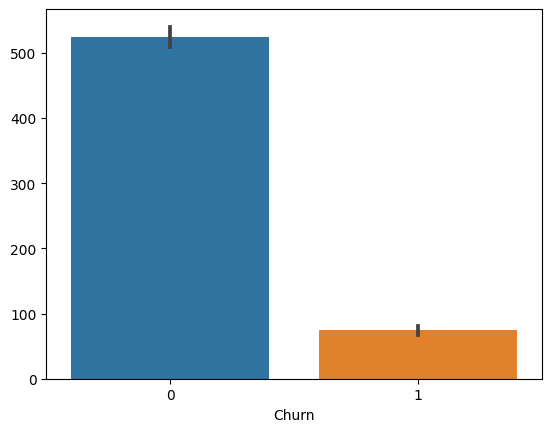

In [38]:
sns.barplot(x="Churn" , y=sdf.Churn.index , data=sdf)

# Makine Öğrenmesi Kısmı